Cell 1 – Import Libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


Cell 2 – Load Dataset

In [16]:
df = pd.read_csv("../data/phishing.csv", on_bad_lines='skip')
df.head()




,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,0,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,2,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,3,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,-1,1,-1,-1,1


Cell 3 – Explore the Dataset

Dataset shape: (11054, 32)
Missing values: 0


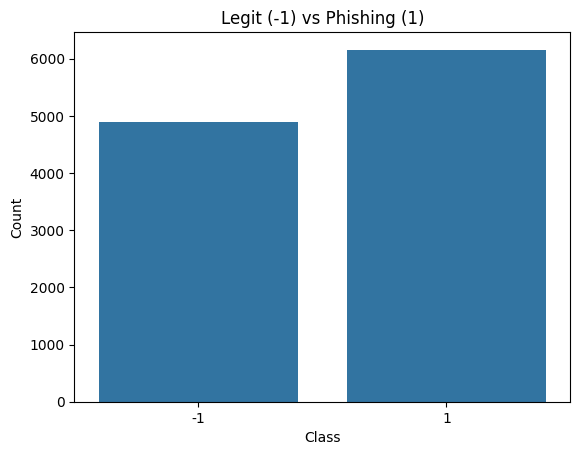

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Clean column names just in case
df.columns = df.columns.str.strip()

print("Dataset shape:", df.shape)
print("Missing values:", df.isnull().sum().sum())

sns.countplot(x="class", data=df)
plt.title("Legit (-1) vs Phishing (1)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


Cell 4 – Prepare Data for Training

In [18]:
from sklearn.model_selection import train_test_split

# Check if 'class' column exists
if 'class' in df.columns:
    X = df.drop('class', axis=1)  # All columns except 'class'
    y = df['class']               # Target column
    
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=0.2,
        random_state=42,
        stratify=y
    )
    
    print("Data split successfully!")
    print("X_train shape:", X_train.shape)
    print("X_test shape:", X_test.shape)
    print("y_train distribution:\n", y_train.value_counts())
else:
    print("Column 'class' not found in DataFrame.")






Data split successfully!
X_train shape: (8843, 31)
X_test shape: (2211, 31)
y_train distribution:
 class
 1    4925
-1    3918
Name: count, dtype: int64


Cell 5 – Train the Model

In [19]:
model = RandomForestClassifier(n_estimators=300, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=300, random_state=42)

 Cell 6 – Evaluate the Model

Accuracy: 96.97 %

Classification Report:
               precision    recall  f1-score   support

          -1       0.97      0.96      0.97       979
           1       0.97      0.98      0.97      1232

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



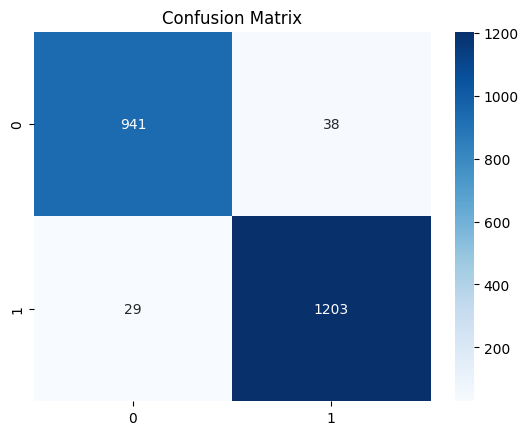

In [20]:
y_pred = model.predict(X_test)

print("Accuracy:", round(accuracy_score(y_test, y_pred)*100, 2), "%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


Cell 7 – Feature Importance + Save Model

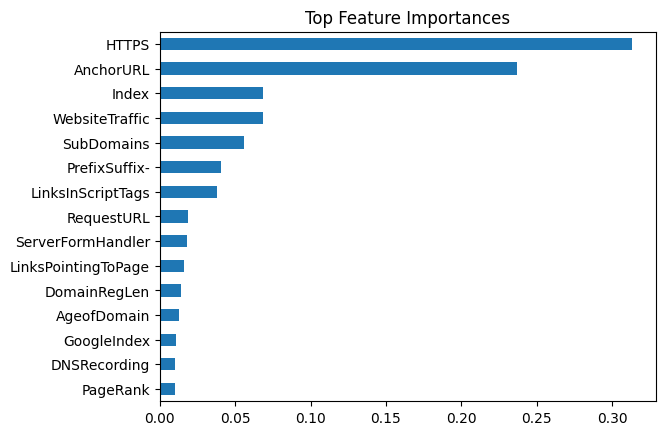

In [21]:
import joblib

# Save the model
joblib.dump(model, "../phishing_model.pkl")

# Plot feature importance
importances = model.feature_importances_
feat_names = X.columns

feature_df = pd.Series(importances, index=feat_names).sort_values(ascending=False)
feature_df.head(15).plot(kind='barh')
plt.title("Top Feature Importances")
plt.gca().invert_yaxis()
plt.show()
